In [1]:
suppressMessages(library(data.table))
suppressMessages(library(tidyverse))
suppressMessages(library(stringr))
suppressMessages(library(ggplot2))
suppressMessages(library(ggpubr))
options(warn=-1) # use options(warn=0) To turn warnings back on
options(dplyr.summarise.inform = FALSE)
options(scipen=2)

In [2]:
setwd("/Users/inamojun/TMDU-LR_isoform_atlas/Figures")

In [3]:
#load data
load("../data/data_SupFig02.RData")

In [4]:
data_raw
data_raw %>%
    dplyr::filter(Metrics == "number_of_reads") %>%
    .$dataset %>% as.integer() %>%
    summary()


Metrics,dataset,cell
<chr>,<chr>,<chr>
number_of_reads,6834399,NaiveCD4
number_of_bases,6630686840.0,NaiveCD4
median_read_length,653.0,NaiveCD4
mean_read_length,970.2,NaiveCD4
read_length_stdev,878.2,NaiveCD4
n50,1339.0,NaiveCD4
mean_qual,13.3,NaiveCD4
median_qual,14.0,NaiveCD4
longest_read_(with_Q):1,148175 (5.1),NaiveCD4


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 1996622  3148068  5721968  6277490  7877355 22866118 

In [5]:
# QC

## fastq

### https://bi.biopapyrus.jp/rnaseq/qc/fastq-quality-score.html
#### If the quality score is 10, the probability of a sequencing error is 0.1, so the confidence level of the read base is 90.0%.
#### If the quality score is 20, the probability of a sequencing error is 0.01, so the confidence level of the read base is 99.0%.
#### If the quality score is 30, the probability of a sequencing error is 0.001, so the confidence level of the bases read is 99.9%.


options(repr.plot.width=6, repr.plot.height=6)

g1 = data_raw %>%
  dplyr::filter(Metrics == "number_of_reads") %>%
  dplyr::mutate(cell = stringr::str_split(cell,pattern="_",simplify=TRUE) %>% .[,1]) %>%
  dplyr::group_by(cell) %>%
  dplyr::mutate(dataset = sum(as.integer(dataset))) %>%
  as.data.frame() %>%
  unique() %>%
  dplyr::arrange(dataset) %>%
  # .$dataset %>% summary()
  dplyr::mutate(group = dplyr::case_when(
                  cell == "NaiveCD4" ~ "CD4T",
                  cell == "Th1" ~ "CD4T",
                  cell == "Th2" ~ "CD4T",
                  cell == "Th17" ~ "CD4T",
                  cell == "Tfh" ~ "CD4T",
                  cell == "Fra1" ~ "CD4T",
                  cell == "Fra2-aTreg" ~ "CD4T",
                  cell == "Fra3" ~ "CD4T",
                  cell == "LAG3Treg" ~ "CD4T",
                  cell == "MemoryCD4" ~ "CD4T",
                  cell == "Thx" ~ "CD4T",
                  cell == "NaiveCD8" ~ "CD8T",
                  cell == "CD8effector" ~ "CD8T",
                  cell == "CD8centralmem" ~ "CD8T",
                  cell == "CD8effectormem" ~ "CD8T",
                  cell == "NaiveB" ~ "B",
                  cell == "unswmemoryB" ~ "B",
                  cell == "swmemoryB" ~ "B",
                  cell == "DNB" ~ "B",
                  cell == "plasmablast" ~ "B",
                  cell == "plasmacytoidDC" ~ "DC",
                  cell == "myeloidDC" ~ "DC",
                  cell == "NK" ~ "NK",
                  cell == "monocyteCD16" ~ "Mono",
                  cell == "monocyteCD16minus" ~ "Mono",
                  cell == "nonclassicalMonocyte" ~ "Mono",
                  cell == "intermediateMonocyte" ~ "Mono",
                  cell == "PBMC" ~ "PBMC",
                  cell == "Neutrophil" ~ "Neu"
                ), 
                cell = dplyr::case_when(
                cell == "NaiveCD4" ~ "NaiveCD4",
                cell == "Th1" ~ "Th1",
                cell == "Th2" ~ "Th2",
                cell == "Th17" ~ "Th17",
                cell == "Tfh" ~ "Tfh",
                cell == "Fra1" ~ "Fr.I nTreg",
                cell == "Fra2-aTreg" ~ "Fr.II aTreg",
                cell == "Fra3" ~ "Fr.III non-Treg",
                cell == "LAG3Treg" ~ "LAG3 Treg",
                cell == "MemoryCD4" ~ "Memory CD4",
                cell == "Thx" ~ "X3lowR6negT",
                cell == "NaiveCD8" ~ "NaiveCD8",
                cell == "CD8effector" ~ "Eff CD8",
                cell == "CD8centralmem" ~ "CM CD8",
                cell == "CD8effectormem" ~ "EM CD8",
                cell == "NaiveB" ~ "NaiveB",
                cell == "unswmemoryB" ~ "USMB",
                cell == "swmemoryB" ~ "SMB",
                cell == "DNB" ~ "DNB",
                cell == "plasmablast" ~ "plasmablast",
                cell == "plasmacytoidDC" ~ "pDC",
                cell == "myeloidDC" ~ "mDC",
                cell == "NK" ~ "NK",
                cell == "monocyteCD16minus" ~ "CL Mono",
                cell == "nonclassicalMonocyte" ~ "NC Mono",
                cell == "intermediateMonocyte" ~ "Int Mono",
                cell == "monocyteCD16" ~ "CD16p Mono",
                cell == "PBMC" ~ "PBMC",
                cell == "Neutrophil" ~ "Neu"),
                cell = factor(cell, levels = c(
                    "NaiveCD4","Th1","Th2","Th17","Tfh","Fr.I nTreg","Fr.II aTreg","Fr.III non-Treg","LAG3 Treg","Memory CD4","X3lowR6negT",
                    "NaiveCD8","Eff CD8","CM CD8","EM CD8",
                    "NaiveB","USMB","SMB","DNB","plasmablast",
                    "pDC","mDC",
                    "NK",
                    "CL Mono","NC Mono","Int Mono","CD16p Mono",
                    "PBMC",
                    "Neu"))) %>%
  ggplot(., aes(x = cell, y = dataset, fill = group)) + 
  geom_bar(stat = "identity") +
  ylab("number of reads") +
  coord_flip() +
  theme_classic() +
  theme(strip.text.x=element_text(size=9, color="black", face="bold"),
        strip.text.y=element_text(size=9, color="black", face="bold"),
        legend.position = "bottom",
        plot.title = element_text(size=8),
        axis.title.x = element_text(size=10),
        axis.title.y = element_text(size =10),
        axis.text.y = element_text(size = 10),
        axis.text.x = element_text(size = 10),
        legend.text =  element_text(size = 10), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 8, hjust = 0))



In [6]:
data_map
data_map %>%
    dplyr::filter(Metrics == "number_of_reads") %>%
    .$dataset %>% as.integer() %>%
    summary()

Metrics,dataset,cell
<chr>,<chr>,<chr>
number_of_reads,5141279,NaiveCD4
number_of_bases,5221634341.0,NaiveCD4
number_of_bases_aligned,4662669903.0,NaiveCD4
fraction_bases_aligned,0.9,NaiveCD4
median_read_length,703.0,NaiveCD4
mean_read_length,1015.6,NaiveCD4
read_length_stdev,896.9,NaiveCD4
n50,1417.0,NaiveCD4
average_identity,96.1,NaiveCD4


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 1503882  2340022  4566622  4890985  6223502 18232607 

In [7]:
g2 = data_map %>%
  dplyr::filter(Metrics == "number_of_reads") %>%
  dplyr::mutate(cell = stringr::str_split(cell,pattern="_",simplify=TRUE) %>% .[,1]) %>%
  dplyr::group_by(cell) %>%
  dplyr::mutate(dataset = sum(as.integer(dataset))) %>%
  as.data.frame() %>%
  unique() %>%
  dplyr::mutate(group = dplyr::case_when(
                  cell == "NaiveCD4" ~ "CD4T",
                  cell == "Th1" ~ "CD4T",
                  cell == "Th2" ~ "CD4T",
                  cell == "Th17" ~ "CD4T",
                  cell == "Tfh" ~ "CD4T",
                  cell == "Fra1" ~ "CD4T",
                  cell == "Fra2-aTreg" ~ "CD4T",
                  cell == "Fra3" ~ "CD4T",
                  cell == "LAG3Treg" ~ "CD4T",
                  cell == "MemoryCD4" ~ "CD4T",
                  cell == "Thx" ~ "CD4T",
                  cell == "NaiveCD8" ~ "CD8T",
                  cell == "CD8effector" ~ "CD8T",
                  cell == "CD8centralmem" ~ "CD8T",
                  cell == "CD8effectormem" ~ "CD8T",
                  cell == "NaiveB" ~ "B",
                  cell == "unswmemoryB" ~ "B",
                  cell == "swmemoryB" ~ "B",
                  cell == "DNB" ~ "B",
                  cell == "plasmablast" ~ "B",
                  cell == "plasmacytoidDC" ~ "DC",
                  cell == "myeloidDC" ~ "DC",
                  cell == "NK" ~ "NK",
                  cell == "monocyteCD16" ~ "Mono",
                  cell == "monocyteCD16minus" ~ "Mono",
                  cell == "nonclassicalMonocyte" ~ "Mono",
                  cell == "intermediateMonocyte" ~ "Mono",
                  cell == "PBMC" ~ "PBMC",
                  cell == "Neutrophil" ~ "Neu"
                ), 
                cell = dplyr::case_when(
                cell == "NaiveCD4" ~ "NaiveCD4",
                cell == "Th1" ~ "Th1",
                cell == "Th2" ~ "Th2",
                cell == "Th17" ~ "Th17",
                cell == "Tfh" ~ "Tfh",
                cell == "Fra1" ~ "Fr.I nTreg",
                cell == "Fra2-aTreg" ~ "Fr.II aTreg",
                cell == "Fra3" ~ "Fr.III non-Treg",
                cell == "LAG3Treg" ~ "LAG3 Treg",
                cell == "MemoryCD4" ~ "Memory CD4",
                cell == "Thx" ~ "X3lowR6negT",
                cell == "NaiveCD8" ~ "NaiveCD8",
                cell == "CD8effector" ~ "Eff CD8",
                cell == "CD8centralmem" ~ "CM CD8",
                cell == "CD8effectormem" ~ "EM CD8",
                cell == "NaiveB" ~ "NaiveB",
                cell == "unswmemoryB" ~ "USMB",
                cell == "swmemoryB" ~ "SMB",
                cell == "DNB" ~ "DNB",
                cell == "plasmablast" ~ "plasmablast",
                cell == "plasmacytoidDC" ~ "pDC",
                cell == "myeloidDC" ~ "mDC",
                cell == "NK" ~ "NK",
                cell == "monocyteCD16minus" ~ "CL Mono",
                cell == "nonclassicalMonocyte" ~ "NC Mono",
                cell == "intermediateMonocyte" ~ "Int Mono",
                cell == "monocyteCD16" ~ "CD16p Mono",
                cell == "PBMC" ~ "PBMC",
                cell == "Neutrophil" ~ "Neu"),
                cell = factor(cell, levels = c(
                    "NaiveCD4","Th1","Th2","Th17","Tfh","Fr.I nTreg","Fr.II aTreg","Fr.III non-Treg","LAG3 Treg","Memory CD4","X3lowR6negT",
                    "NaiveCD8","Eff CD8","CM CD8","EM CD8",
                    "NaiveB","USMB","SMB","DNB","plasmablast",
                    "pDC","mDC",
                    "NK",
                    "CL Mono","NC Mono","Int Mono","CD16p Mono",
                    "PBMC",
                    "Neu"))) %>%
  ggplot(., aes(x = cell, y = dataset, fill = group)) + 
  geom_bar(stat = "identity") +
  ylab("number of reads") +
  coord_flip() +
  theme_classic() +
  theme(strip.text.x=element_text(size=9, color="black", face="bold"),
        strip.text.y=element_text(size=9, color="black", face="bold"),
        legend.position = "bottom",
        plot.title = element_text(size=8),
        axis.title.x = element_text(size=10),
        axis.title.y = element_text(size =10),
        axis.text.y = element_text(size = 10),
        axis.text.x = element_text(size = 10),
        legend.text =  element_text(size = 10), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 8, hjust = 0))

pdf 
  2

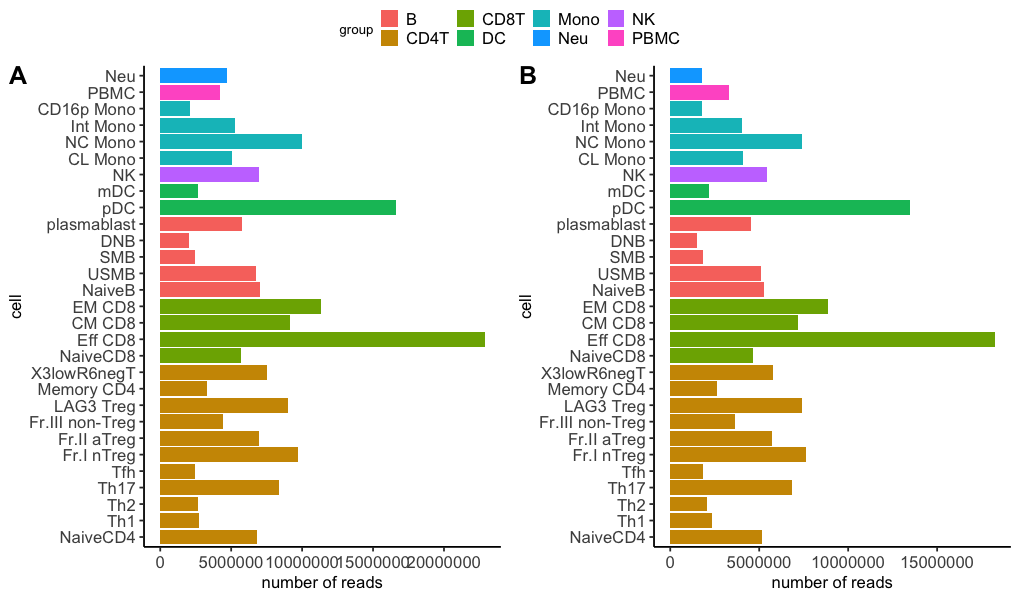

In [9]:
options(repr.plot.width=10, repr.plot.height=5)
ggarrange(g1,g2, 
          nrow = 1, 
          labels = c("A","B"),
          font.label = list(size = 15, color = "black"),
          common.legend = TRUE
          ) 


pdf("./FigS1.pdf", width=10, height=5)
ggarrange(g1,g2, 
          nrow = 1, 
          labels = c("A","B"),
          font.label = list(size = 15, color = "black"),
          common.legend = TRUE
          ) 
dev.off()